In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ujipenchars2
import string
import random
import itertools

In [2]:
train, test = ujipenchars2.Parser('data/ujipenchars2').parse(string.digits)

In [3]:
len(train), len(test)

(800, 400)

In [4]:
from preprocessing import DrawingScaler

def plot_drawing(drawing):
    plt.title(drawing.label)
    for stroke in drawing.strokes:
        plt.plot(stroke[:,0], stroke[:,1], color='black', linewidth=10, solid_capstyle='round')
    plt.axis('scaled')

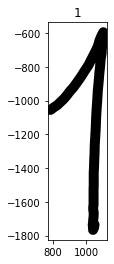

In [5]:
drawing = random.choice(train+test)
plot_drawing(drawing)

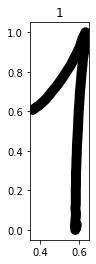

In [6]:
from preprocessing import DrawingScaler
plot_drawing(DrawingScaler().fit_transform([drawing])[0])

In [7]:
print('Broj poteza u znamenkama')
pd.Series(len(entry.strokes) for entry in test).value_counts()

Broj poteza u znamenkama


1    311
2     88
3      1
dtype: int64

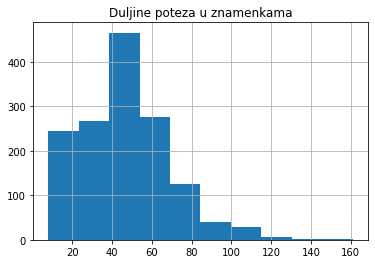

In [8]:
all_strokes_iterator = itertools.chain.from_iterable((entry.strokes for entry in train+test))
pd.Series(len(stroke) for stroke in all_strokes_iterator).hist()
plt.title('Duljine poteza u znamenkama')
plt.show()